<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Tải các thư viện cần thiết</strong></p>
</div>


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew #for some statistics
 
warnings.filterwarnings('ignore')

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Thông tin tổng quan của Dataset:</strong></p>
</div>


In [25]:
# Tải dữ liệu từ file CSV (Ví dụ, bạn cần tải dataset Kaggle)
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv') 
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')  
print ("Size of train data : {}" .format(train.shape))

print ("Size of test data : {}" .format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


In [26]:
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [27]:
print ("Size of train data after dropping Id: {}" .format(train.shape))
print ("Size of test data after dropping Id: {}" .format(test.shape))

Size of train data after dropping Id: (1460, 80)
Size of test data after dropping Id: (1459, 79)


In [28]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Log transform cho biến SalePrice  </strong></p>
</div>


### Tại sao phải sử dụng `log1p` cho `SalePrice`?

Việc áp dụng hàm log (cụ thể là `np.log1p`, tức `log(1 + x)`) lên biến mục tiêu `SalePrice` có nhiều lợi ích quan trọng trong quá trình huấn luyện mô hình:

---

#### 1. **Giảm sự lệch (skewness) trong phân phối**
- Dữ liệu giá nhà thường có phân phối **lệch phải** (phần đuôi kéo dài về phía các giá trị lớn).
- Các mô hình học máy (như Linear Regression, Ridge, v.v.) hoạt động hiệu quả hơn khi biến mục tiêu có phân phối **gần chuẩn (normal distribution)**.

📉 Trước khi log-transform: Phân phối lệch, dễ bị ảnh hưởng bởi outlier.  
📈 Sau khi log-transform: Phân phối gần chuẩn, giúp mô hình học tốt hơn.

---

#### 2. **Giảm ảnh hưởng của giá trị ngoại lai (outliers)**
- Các giá trị quá lớn sẽ được "nén" lại sau khi log-transform, giảm ảnh hưởng tiêu cực đến quá trình học.

Ví dụ:  
| Giá gốc (SalePrice) | Sau log1p (log(1 + x)) |
|---------------------|------------------------|
| 100000              | ≈ 11.5                 |
| 500000              | ≈ 13.1                 |
| 1000000             | ≈ 13.8                 |

---

#### 3. **Tăng khả năng mô hình hóa quan hệ tuyến tính**
- Quan hệ giữa các biến đặc trưng và giá nhà có thể phi tuyến ở thang đo gốc.
- Sau khi lấy log, quan hệ có thể trở nên gần **tuyến tính hơn**, đặc biệt hữu ích cho các mô hình tuyến tính.

---

#### 4. **Dễ dàng chuyển ngược lại sau khi dự đoán**
- Sau khi mô hình dự đoán xong, có thể dùng `np.expm1()` để chuyển kết quả về dạng ban đầu:
  


 mu = 180921.20 and sigma = 79415.29



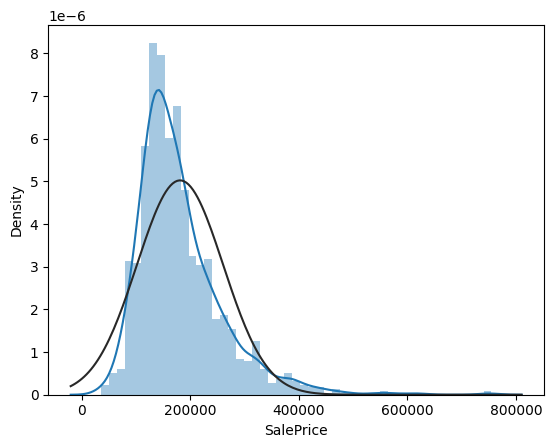

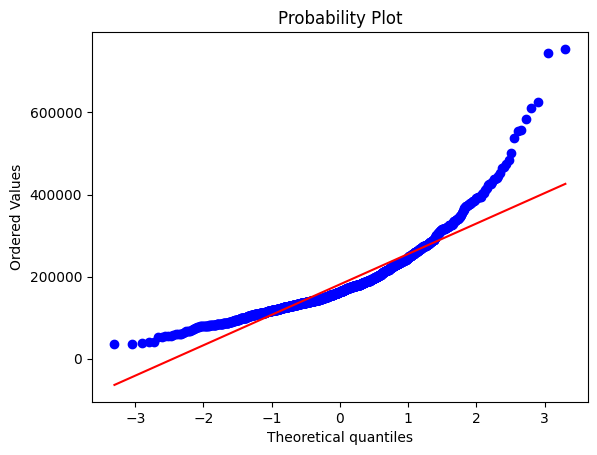

In [30]:
def check_skewness(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('SalePrice')


 mu = 12.02 and sigma = 0.40



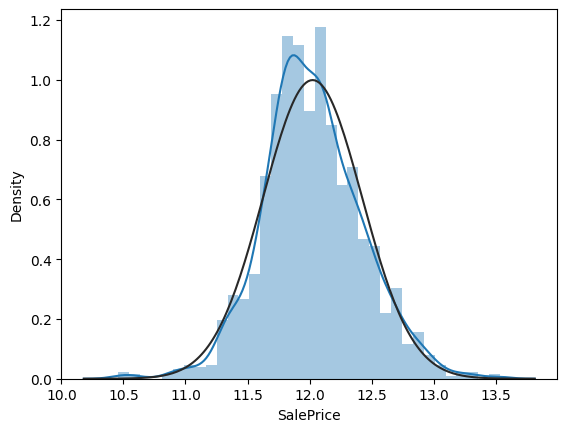

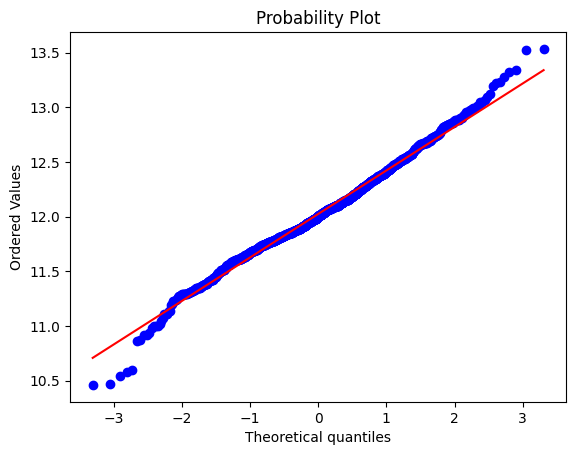

In [31]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

check_skewness('SalePrice')

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Xử lý outliers </strong></p>
</div>


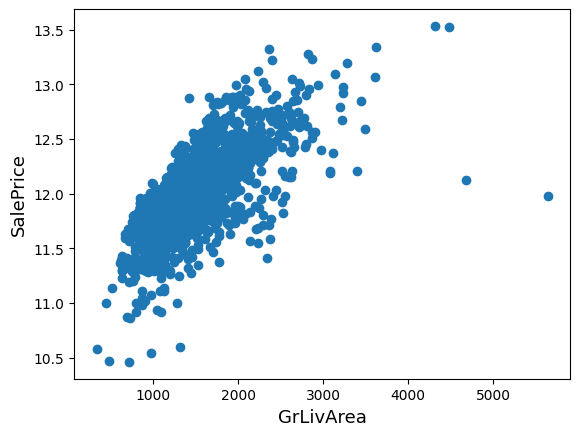

In [32]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [33]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [34]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Xử lý cột bị missing value</strong></p>
</div>


In [35]:
# concat train and test
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(df.shape))

all_data size is : (2915, 79)


In [36]:
df_copy = df.copy()

In [37]:
# Phân tích dữ liệu bị thiếu
missing_data =df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})

print(missing_df)


              Missing Count  Missing %
PoolQC                 2907  99.725557
MiscFeature            2810  96.397942
Alley                  2717  93.207547
Fence                  2345  80.445969
MasVnrType             1765  60.548885
FireplaceQu            1420  48.713551
LotFrontage             486  16.672384
GarageFinish            159   5.454545
GarageQual              159   5.454545
GarageCond              159   5.454545
GarageYrBlt             159   5.454545
GarageType              157   5.385935
BsmtExposure             82   2.813036
BsmtCond                 82   2.813036
BsmtQual                 81   2.778731
BsmtFinType2             80   2.744425
BsmtFinType1             79   2.710120
MasVnrArea               23   0.789022
MSZoning                  4   0.137221
BsmtFullBath              2   0.068611
BsmtHalfBath              2   0.068611
Functional                2   0.068611
Utilities                 2   0.068611
GarageArea                1   0.034305
GarageCars               

* **PoolQC** has the highest null values according to the data documentation says **null values means 'No Pool.**
Since majority of houses has no pool.
So we will replace those null values with 'None'.
* **MiscFeature** : Data documentation says NA means "no misc feature"
* **Alley** : data description says NA means "no alley access"
* **Fence** : data description says NA means "no fence"
* **FireplaceQu** : data description says NA means "no fireplace"
* **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None as per documentation.
* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.
* **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
* **MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
* **Utilities** : Since this is a categorical data and most of the data are of same category, Its not gonna effect on model. So we choose to drop it.
* **Functional** : data description says NA means typical
* **Electrical,KitchenQual, Exterior1st, Exterior2nd, SaleType** : Since this all are categorical values so its better to replace nan values with the most used keyword.
* **MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [38]:
# Cột kiểu chuỗi (categorical) - điền bằng 'None'
df['PoolQC'] = df['PoolQC'].fillna('NA') #
df['MiscFeature'] = df['MiscFeature'].fillna('NA') #
df['Alley'] = df['Alley'].fillna('NA') #
df['Fence'] = df['Fence'].fillna('NA') #
df['MasVnrType'] = df['MasVnrType'].fillna('None') #
df['MSSubClass'] = df['MSSubClass'].fillna('None') #
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA') #
df['GarageType'] = df['GarageType'].fillna('NA') #
df['GarageFinish'] = df['GarageFinish'].fillna('NA') #
df['GarageQual'] = df['GarageQual'].fillna('NA') #
df['GarageCond'] = df['GarageCond'].fillna('NA') #
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA') #
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA') #
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA') #
df['BsmtQual'] = df['BsmtQual'].fillna('NA') #
df['BsmtCond'] = df['BsmtCond'].fillna('NA') #
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0]) #
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0]) #
df['Functional'] = df['Functional'].fillna('Typ') #
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0]) #
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0]) #
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0]) #
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0]) #

df = df.drop(['Utilities'], axis=1) #

* **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
* **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)
* **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [39]:
# Cột số - điền bằng median
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())) #
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0) #
df['MasVnrArea'] = df['MasVnrArea'].fillna(0) #
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0) #
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0) #
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0) #
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0) #
df['GarageCars'] = df['GarageCars'].fillna(0) #
df['GarageArea'] = df['GarageArea'].fillna(0) #
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0) #
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0) #

In [40]:
#Kiểm tra missing values trong bảng
print("Số lượng missing value còn lại:")
print(df.isnull().sum().sort_values(ascending=False).head(60))


Số lượng missing value còn lại:
MSSubClass       0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
HalfBath         0
GarageFinish     0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageYrBlt      0
GarageCars       0
MSZoning         0
PoolArea         0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
ScreenPorch      0
GarageArea       0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
Electrical       0
CentralAir       0
HeatingQC        0
Neighborhood     0
YearBuilt        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
LandSlope        0
Heating          0

In [41]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,FR2,Gtl,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,Corner,Gtl,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,FR2,Gtl,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,160,RM,21.0,1936,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
2911,160,RM,21.0,1894,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
2912,20,RL,160.0,20000,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
2913,85,RL,62.0,10441,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal


<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>6. Xử lý cột dạng phân loại ordinal và nominal  </strong></p>
</div>


**Converting some numerical variables that are really categorical type.**

As you can see the category range from 1 to 9 which are numerical (**not ordinal type**). Since its categorical we need to change it to String type.

If we do not convert these to categorical, some model may get affect by this as model will compare the value 1<5<10 . We dont need that to happen with our model.

In [42]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [43]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
category_df = df[categorical_columns]
len(categorical_columns)

46

In [44]:
for col in df.columns:
    print(col)


MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition


In [45]:
def check_and_categorize_columns(df):
    # Xác định các cột ordinal và nominal
    ordinal_cols = [
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
        'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
        'BsmtExposure', 'Functional', 'LandSlope', 'PavedDrive', 'BsmtFinType1', 'BsmtFinType2', 
        'GarageFinish', 'PoolQC', 'Fence', 'LotShape',
    ]

    nominal_cols = [col for col in categorical_columns if col not in ordinal_cols]

    # In ra kết quả
    print("\nOrdinal columns:", ordinal_cols)
    print("\nNominal columns:", nominal_cols)

    return ordinal_cols, nominal_cols

# Gọi hàm
ordinal_cols, nominal_cols = check_and_categorize_columns(df)


Ordinal columns: ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'Functional', 'LandSlope', 'PavedDrive', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'PoolQC', 'Fence', 'LotShape']

Nominal columns: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [46]:
# Danh sách các cột Ordinal
ordinal_cols = [
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'HeatingQC',
    'KitchenQual',
    'FireplaceQu',
    'GarageQual',
    'GarageCond',
    'BsmtExposure',
    'Functional',
    'LandSlope',
    'PavedDrive',
    'BsmtFinType1',
    'BsmtFinType2',
    'GarageFinish',
    'PoolQC',
    'Fence',
    'LotShape'
]

# Danh sách các cột Nominal
nominal_cols = [
    'MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LandContour',
    'LotConfig',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Foundation',
    'Heating',
    'CentralAir',
    'Electrical',
    'GarageType',
    'MiscFeature',
    'SaleType',
    'SaleCondition',
]
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# Apply LabelEncoder to categorical features that are not ordinal
for c in cols:
    if c not in ordinal_cols:
        lbl = LabelEncoder() 
        df[c] = df[c].astype(str)  # Đảm bảo tất cả là chuỗi để tránh lỗi
        lbl.fit(df[c]) 
        df[c] = lbl.transform(df[c])

# Xác định thứ tự cho các cột ordinal
ordinal_mapping = {
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'BsmtQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'BsmtCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0},
    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Reg': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Reg': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0},
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},

}

# Xử lý cột ordinal
for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping).fillna(0).astype(int)

In [47]:
# Kiểm tra kết quả
df[ordinal_cols]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtExposure,Functional,LandSlope,PavedDrive,BsmtFinType1,BsmtFinType2,GarageFinish,PoolQC,Fence,LotShape
0,4,2,3,2,4,3,0,3,3,1,7,3,2,6,1,2,0,0,4
1,3,2,3,2,4,2,3,3,3,4,7,3,2,5,1,2,0,0,4
2,4,2,3,2,4,3,3,3,3,2,7,3,2,6,1,2,0,0,3
3,3,2,2,3,3,3,4,3,3,1,7,3,2,5,1,1,0,0,3
4,4,2,3,2,4,3,3,3,3,3,7,3,2,6,1,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,3,2,2,2,3,2,0,0,0,1,7,3,2,1,1,0,0,0,4
2911,3,2,2,2,2,2,0,3,3,1,7,3,2,0,1,1,0,0,4
2912,3,2,2,2,4,2,3,3,3,1,7,3,2,5,1,1,0,0,4
2913,3,2,3,2,2,2,0,0,0,3,7,3,2,6,1,0,0,3,4


In [48]:
df[nominal_cols]

,MSSubClass,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,10,RL,1,1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GasA,1,SBrkr,Attchd,NA,WD,Normal
1,5,RL,1,1,Lvl,FR2,Veenker,Feedr,Norm,1Fam,...,MetalSd,None,CBlock,GasA,1,SBrkr,Attchd,NA,WD,Normal
2,10,RL,1,1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GasA,1,SBrkr,Attchd,NA,WD,Normal
3,11,RL,1,1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,...,Wd Shng,None,BrkTil,GasA,1,SBrkr,Detchd,NA,WD,Abnorml
4,10,RL,1,1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GasA,1,SBrkr,Attchd,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2,RM,1,1,Lvl,Inside,MeadowV,Norm,Norm,Twnhs,...,CmentBd,None,CBlock,GasA,1,SBrkr,NA,NA,WD,Normal
2911,2,RM,1,1,Lvl,Inside,MeadowV,Norm,Norm,TwnhsE,...,CmentBd,None,CBlock,GasA,1,SBrkr,CarPort,NA,WD,Abnorml
2912,5,RL,1,1,Lvl,Inside,Mitchel,Norm,Norm,1Fam,...,VinylSd,None,CBlock,GasA,1,SBrkr,Detchd,NA,WD,Abnorml
2913,14,RL,1,1,Lvl,Inside,Mitchel,Norm,Norm,1Fam,...,Wd Shng,None,PConc,GasA,1,SBrkr,NA,Shed,WD,Normal


In [49]:
# Xử lý cột nominal
df = pd.get_dummies(df)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Xử lý cột bị lệch nặng</strong></p>
</div>


In [50]:
# Chỉ lấy các biến số, loại bỏ kiểu bool
numeric_feats = df.select_dtypes(include=['int64', 'float64']).columns

# Kiểm tra độ lệch (skewness) của các biến số
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(15)



Skew in numerical features: 



,Skew
MiscVal,21.932147
PoolQC,21.906328
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.000796
ScreenPorch,3.943508


In [51]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

There are 58 skewed numerical features to Box Cox transform


In [52]:
# Chuyển y_train thành Series với tên cột
y_train = pd.Series(y_train, name='SalePrice')

In [53]:
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1451    12.072547
1452    12.254868
1453    12.493133
1454    11.864469
1455    11.901590
Name: SalePrice, Length: 1456, dtype: float64

In [54]:
df_new = df.copy()

In [55]:
df_train = df[:train.shape[0]]   # Dòng 0 đến train.shape[0] - 1
df_test = df[train.shape[0]:]    # Dòng từ train.shape[0] trở đi

In [56]:
df_train

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.820334,1.540963,2.440268,1.820334,14.187527,...,False,False,False,True,False,False,False,False,True,False
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.820334,1.540963,2.259674,2.440268,14.145138,...,False,False,False,True,False,False,False,False,True,False
2,2.885846,5.914940,20.347241,0.730463,0.730463,1.540963,1.540963,2.440268,1.820334,14.184404,...,False,False,False,True,False,False,False,False,True,False
3,3.011340,5.684507,19.691553,0.730463,0.730463,1.540963,1.540963,2.440268,1.820334,14.047529,...,False,False,False,True,True,False,False,False,False,False
4,2.885846,6.314735,21.325160,0.730463,0.730463,1.540963,1.540963,2.602594,1.820334,14.182841,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2.885846,5.744420,18.960528,0.730463,0.730463,1.820334,1.540963,2.259674,1.820334,14.181278,...,False,False,False,True,False,False,False,False,True,False
1452,2.055642,6.337529,20.994868,0.730463,0.730463,1.820334,1.540963,2.259674,2.055642,14.148295,...,False,False,False,True,False,False,False,False,True,False
1453,3.011340,5.859551,19.476345,0.730463,0.730463,1.820334,1.540963,2.440268,2.602594,14.089451,...,False,False,False,True,False,False,False,False,True,False
1454,2.055642,5.914940,19.760176,0.730463,0.730463,1.820334,1.540963,2.055642,2.055642,14.103852,...,False,False,False,True,False,False,False,False,True,False


In [57]:
df_test

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1456,2.055642,6.221214,20.479373,0.730463,0.730463,1.820334,1.540963,2.055642,2.055642,14.121376,...,False,False,False,True,False,False,False,False,True,False
1457,2.055642,6.244956,21.327220,0.730463,0.730463,1.540963,1.540963,2.259674,2.055642,14.116605,...,False,False,False,True,False,False,False,False,True,False
1458,2.885846,6.073289,21.196905,0.730463,0.730463,1.540963,1.540963,2.055642,1.820334,14.178149,...,False,False,False,True,False,False,False,False,True,False
1459,2.885846,6.172972,19.865444,0.730463,0.730463,1.540963,1.540963,2.259674,2.055642,14.179714,...,False,False,False,True,False,False,False,False,True,False
1460,0.000000,5.093857,17.257255,0.730463,0.730463,1.540963,1.540963,2.602594,1.820334,14.170316,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,1.194318,3.932510,14.081426,0.730463,0.730463,1.820334,1.540963,1.820334,2.259674,14.135652,...,False,False,False,True,False,False,False,False,True,False
2911,1.194318,3.932510,14.013314,0.730463,0.730463,1.820334,1.540963,1.820334,1.820334,14.135652,...,False,False,False,True,True,False,False,False,False,False
2912,2.055642,7.620056,22.782058,0.730463,0.730463,1.820334,1.540963,2.055642,2.259674,14.119786,...,False,False,False,True,True,False,False,False,False,False
2913,3.340760,5.744420,20.046557,0.730463,0.730463,1.820334,1.540963,2.055642,1.820334,14.170316,...,False,False,False,True,False,False,False,False,True,False


In [58]:
# Gộp lại vào train
df_train = pd.concat([df_train, y_train], axis=1)

In [59]:
df_train

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.820334,1.540963,2.440268,1.820334,14.187527,...,False,False,True,False,False,False,False,True,False,12.247699
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.820334,1.540963,2.259674,2.440268,14.145138,...,False,False,True,False,False,False,False,True,False,12.109016
2,2.885846,5.914940,20.347241,0.730463,0.730463,1.540963,1.540963,2.440268,1.820334,14.184404,...,False,False,True,False,False,False,False,True,False,12.317171
3,3.011340,5.684507,19.691553,0.730463,0.730463,1.540963,1.540963,2.440268,1.820334,14.047529,...,False,False,True,True,False,False,False,False,False,11.849405
4,2.885846,6.314735,21.325160,0.730463,0.730463,1.540963,1.540963,2.602594,1.820334,14.182841,...,False,False,True,False,False,False,False,True,False,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2.885846,5.744420,18.960528,0.730463,0.730463,1.820334,1.540963,2.259674,1.820334,14.181278,...,False,False,True,False,False,False,False,True,False,12.072547
1452,2.055642,6.337529,20.994868,0.730463,0.730463,1.820334,1.540963,2.259674,2.055642,14.148295,...,False,False,True,False,False,False,False,True,False,12.254868
1453,3.011340,5.859551,19.476345,0.730463,0.730463,1.820334,1.540963,2.440268,2.602594,14.089451,...,False,False,True,False,False,False,False,True,False,12.493133
1454,2.055642,5.914940,19.760176,0.730463,0.730463,1.820334,1.540963,2.055642,2.055642,14.103852,...,False,False,True,False,False,False,False,True,False,11.864469


In [60]:
df_test

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1456,2.055642,6.221214,20.479373,0.730463,0.730463,1.820334,1.540963,2.055642,2.055642,14.121376,...,False,False,False,True,False,False,False,False,True,False
1457,2.055642,6.244956,21.327220,0.730463,0.730463,1.540963,1.540963,2.259674,2.055642,14.116605,...,False,False,False,True,False,False,False,False,True,False
1458,2.885846,6.073289,21.196905,0.730463,0.730463,1.540963,1.540963,2.055642,1.820334,14.178149,...,False,False,False,True,False,False,False,False,True,False
1459,2.885846,6.172972,19.865444,0.730463,0.730463,1.540963,1.540963,2.259674,2.055642,14.179714,...,False,False,False,True,False,False,False,False,True,False
1460,0.000000,5.093857,17.257255,0.730463,0.730463,1.540963,1.540963,2.602594,1.820334,14.170316,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,1.194318,3.932510,14.081426,0.730463,0.730463,1.820334,1.540963,1.820334,2.259674,14.135652,...,False,False,False,True,False,False,False,False,True,False
2911,1.194318,3.932510,14.013314,0.730463,0.730463,1.820334,1.540963,1.820334,1.820334,14.135652,...,False,False,False,True,True,False,False,False,False,False
2912,2.055642,7.620056,22.782058,0.730463,0.730463,1.820334,1.540963,2.055642,2.259674,14.119786,...,False,False,False,True,True,False,False,False,False,False
2913,3.340760,5.744420,20.046557,0.730463,0.730463,1.820334,1.540963,2.055642,1.820334,14.170316,...,False,False,False,True,False,False,False,False,True,False


In [61]:
df_train.to_csv('Train.csv', index=False)
df_test.to_csv('Test.csv', index=False)


In [62]:
df.to_csv('Preprocessing.csv', index=False)